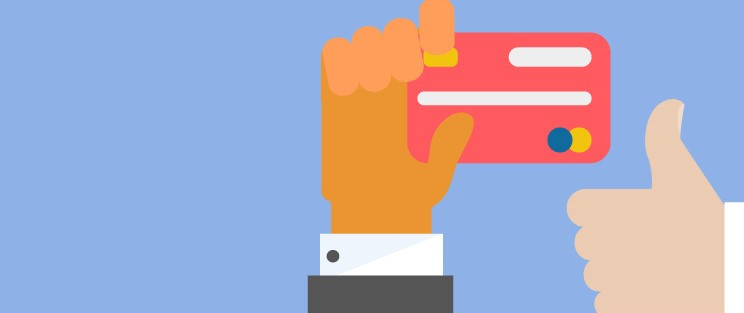
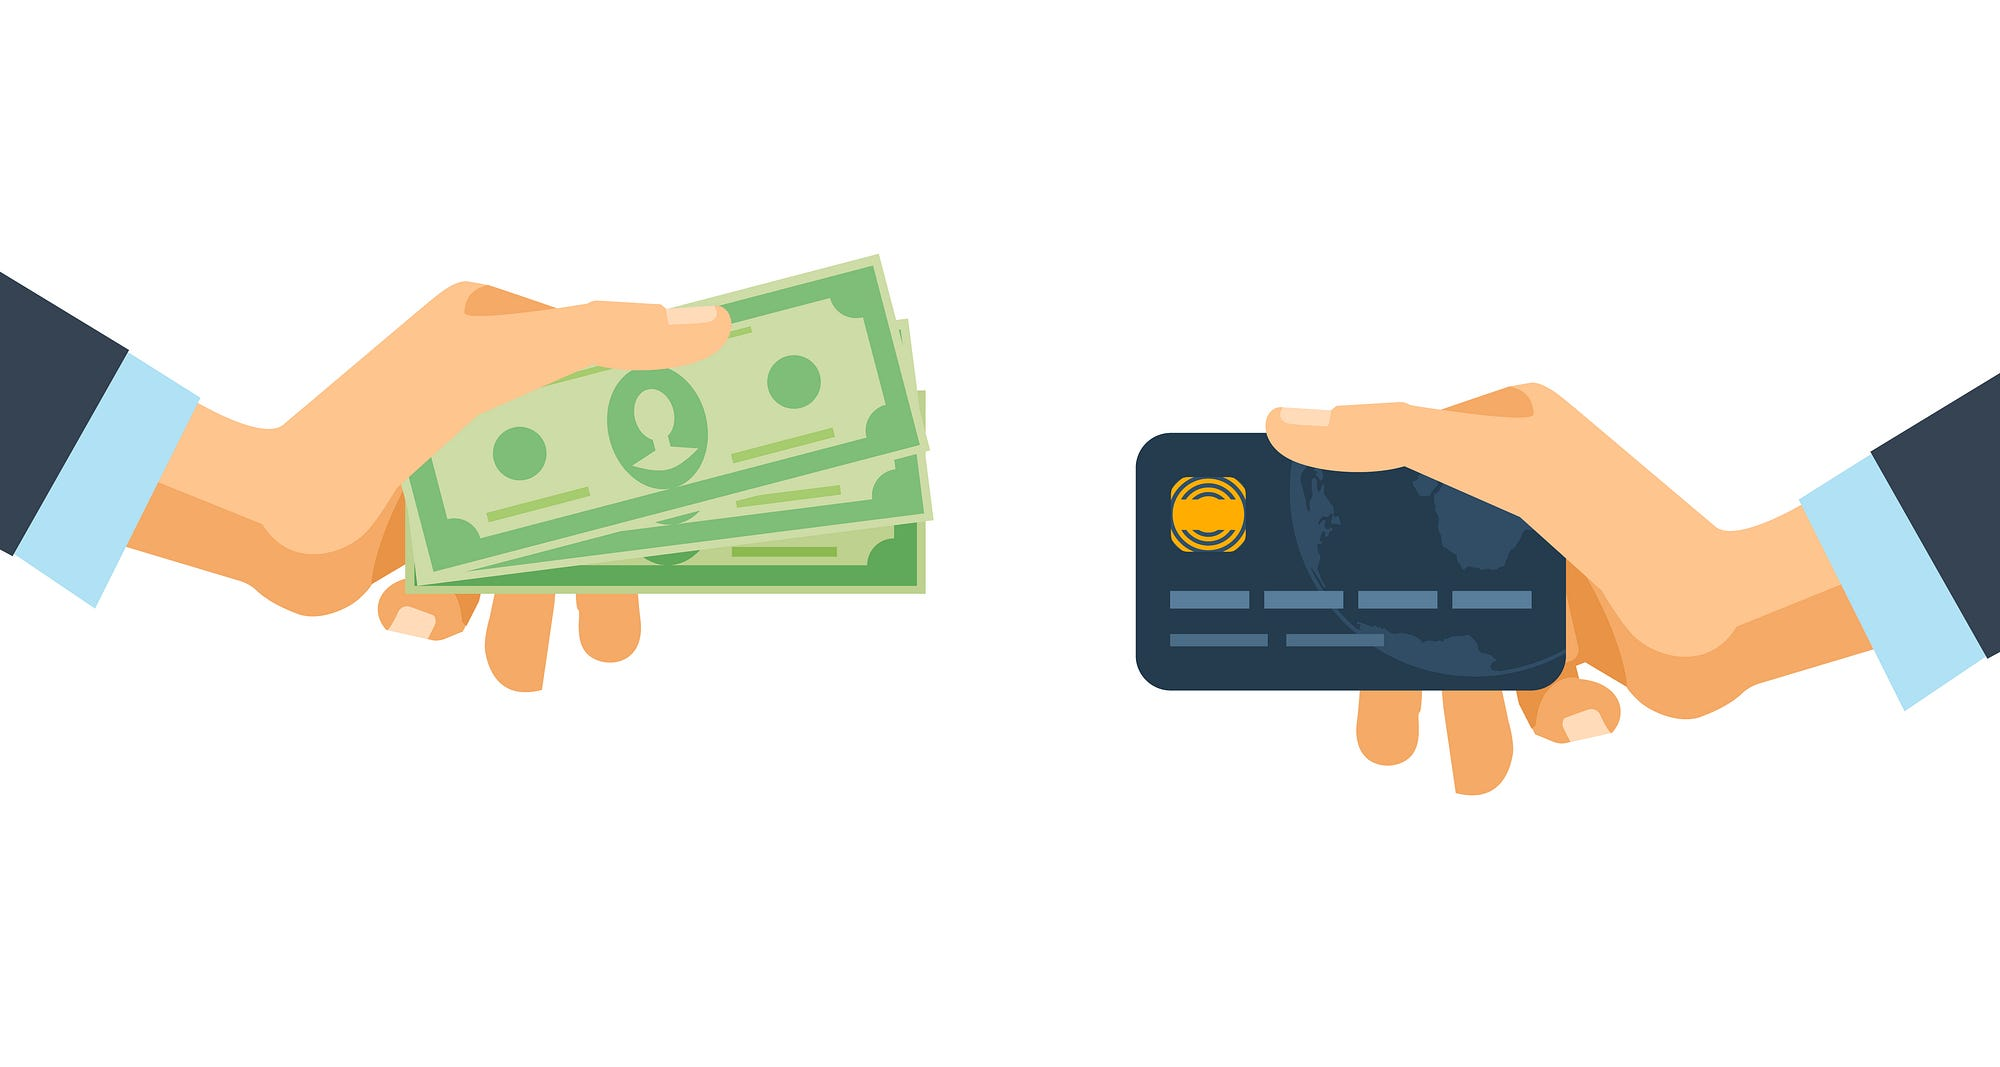

<h2 style="font-size: 30px; font-family: cursive; color:#191970">Project Goal</h2>

<h4 style="color: rgb(70, 80, 96); opacity: 0.8;  letter-spacing: 2px; line-height: 1.6">To develop a robust machine learning model that accurately predicts the probability of a credit card applicant defaulting on their loan. 
By analyzing a comprehensive dataset containing demographic, financial, and credit history information, we aim to assist financial institutions in making informed decisions regarding credit card issuance and risk management.</h4>


<h2 style="font-size: 30px; font-family: cursive; color:#191970">Dataset Overview </h2>

<h4 style="color: rgb(70, 80, 96); opacity: 0.8;  letter-spacing: 2px; line-height: 1.6">
    
**The dataset comprises two key files:**

1. application_record.csv:
* Contains information about credit card applicants, including:
* Demographic details (gender, age, family status)
* Financial information (income, employment status)
* Property ownership and housing type

2. credit_record.csv:
* Records the credit history of applicants, providing insights into:
* Monthly payment status (on-time, delayed, defaulted)
* Credit limit utilization

**Key Questions to Address:**
* Identifying Risk Factors: What are the most significant factors that contribute to credit card default?
* Optimizing Prediction Accuracy: How can we balance precision and recall to minimize both false positives and false     negatives?
* Enhancing Model Interpretability: Can we understand the underlying reasons behind the model's predictions?
* Improving Business Decision-Making: How can the model's insights be leveraged to improve credit risk assessment and customer segmentation?
</h4>




# <font color='#e7395b'>📥 Data Loading </font> 
* We begin by loading the data and inspecting it to understand the basic structure.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,12.27)})
%matplotlib inline



In [2]:
application_record  = pd.read_csv('/kaggle/input/a-credit-card-dataset-for-machine-exam/application_record.csv')
credit_record  = pd.read_csv('/kaggle/input/a-credit-card-dataset-for-machine-exam/credit_record.csv')

In [3]:
print(f"application_record has {application_record.shape[0]} rows and {application_record.shape[1]} columns")
print(f"credit_record has {credit_record.shape[0]} rows and {credit_record.shape[1]} columns")

application_record has 438557 rows and 18 columns
credit_record has 1048575 rows and 3 columns


# <font color='#e7395b'> 🔍 Understand Data </font> 
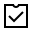
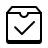

#### 1. **application_record**
 
🆔 Identification

- ID: Unique identifier for each applicant.

👥 Demographics

- CODE_GENDER: Applicant's gender (M for Male, F for Female).
- FLAG_OWN_CAR: Car ownership status (Y for Yes, N for No).
- FLAG_OWN_REALTY: Real estate ownership status (Y for Yes, N for No).
- CNT_CHILDREN: Number of children.

💰 Financial Details

- AMT_INCOME_TOTAL: Total annual income (in currency units).
- NAME_INCOME_TYPE: Source of income (e.g., Working, Pensioner).

🎓 Education & Lifestyle

- NAME_EDUCATION_TYPE: Education level (e.g., Higher education, Secondary education).
- NAME_FAMILY_STATUS: Marital status (e.g., Married, Single).
- NAME_HOUSING_TYPE: Housing type (e.g., House/apartment, Rented apartment).

📅 Life Timeline

- DAYS_BIRTH: Age in days (negative values; convert to years for clarity).
- DAYS_EMPLOYED: Employment duration in days (negative values; handle anomalies for extreme values).

📞 Communication Flags

- FLAG_MOBIL: Mobile phone ownership.
- FLAG_WORK_PHONE: Work phone ownership.
- FLAG_PHONE: Home phone ownership.
- FLAG_EMAIL: Email ownership.

💼 Others

- OCCUPATION_TYPE: Job category.
- CNT_FAM_MEMBERS: Total number of family members.

#### **credit_record**
   
🆔 Identification
* ID: Unique identifier linking to application_record.csv.
  
📅 Monthly Records
* MONTHS_BALANCE: Number of months relative to the current record (negative values).
  
🔗 Credit Status
* STATUS: Indicates the credit status for the month:
    0, 1, 2, 3, 4, 5: Months past due (higher values mean worse behavior).
    C: Account closed.
    X: No credit activity during the month.

# <font color='#e7395b'> 🧹 Data Cleaning </font> 
* In this step, we clean the data by check missing values, correcting data types, and handling duplicates.
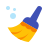

#### **Check datatypes**

In [4]:
print(application_record .info())
print(credit_record .info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
# Convert columns to object type

# List of columns to transform
binary_columns = ['FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']

# Convert 1 to 'Y' and 0 to 'N', and change dtype to object
for col in binary_columns:
    application_record[col] = application_record[col].replace({1: 'Y', 0: 'N'}).astype('object')

In [6]:
# Map the STATUS column to numerical values for consistency and easier analysis:
status_map = {'X': 0, 'C': -1, '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}
credit_record['STATUS'] = credit_record['STATUS'].map(status_map)


# - 'X' (no balance) is mapped to 0 to represent no overdue.
# - 'C' (closed) is mapped to -1 to distinguish closed accounts from active ones.
# - '0' to '5' are mapped to their integer equivalents to indicate overdue months (e.g., '1' means 1 month overdue).
# This transformation ensures that STATUS can be treated as a numerical feature for analysis and modeling.

In [7]:
# Convert to int if all values are whole numbers
application_record['CNT_FAM_MEMBERS'] = application_record['CNT_FAM_MEMBERS'].astype(int)

#### **Handling Duplicates**

In [8]:
print(application_record.duplicated().sum())
print(credit_record.duplicated().sum())

0
0


#### **Check Missing Values**

In [9]:
print(application_record.isna().sum())
print(credit_record.isna().sum())

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64
ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


In [10]:
# Fill missing values in the OCCUPATION_TYPE column with 'Unknown'
application_record['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

/tmp/ipykernel_23/4283041391.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  application_record['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)


#### **Fixing Invalid Values**

In [11]:
# Convert DAYS_BIRTH to positive values and calculate age in years
application_record['AGE_YEARS'] = (-application_record['DAYS_BIRTH'] / 365).astype(int)

In [12]:
# Assuming application_record is the DataFrame with the DAYS_EMPLOYED column

# Step 1: Convert incorrect min/max values to NaN (365243 is the erroneous value)
application_record['DAYS_EMPLOYED'] = application_record['DAYS_EMPLOYED'].apply(
    lambda x: np.nan if x == 365243 else x
)


# Step 2: Handle negative values by converting them to positive
application_record['DAYS_EMPLOYED'] = application_record['DAYS_EMPLOYED'].apply(lambda x: abs(x) if pd.notna(x) else x)

# Step 3: Convert the number of days into years (divide by 365)
application_record['YEARS_EMPLOYED'] = application_record['DAYS_EMPLOYED'] / 365

# Step 4: Drop rows with NaN values in the 'YEARS_EMPLOYED' column
application_record.dropna(subset=['YEARS_EMPLOYED'], inplace=True)

In [13]:
# Standardize the categories (e.g., remove any leading/trailing spaces, fix typos, or unify category names)

application_record['NAME_HOUSING_TYPE'] = application_record['NAME_HOUSING_TYPE'].replace({
    'House / apartment': 'Apartment',  'Co-op apartment': 'Co-op Apartment' })

application_record['NAME_EDUCATION_TYPE'] = application_record['NAME_EDUCATION_TYPE'].replace({
    'Secondary / secondary special': 'Secondary' })


application_record['NAME_FAMILY_STATUS'] = application_record['NAME_FAMILY_STATUS'].replace({
    'Single / not married': 'Single' })

application_record['OCCUPATION_TYPE'] = application_record['OCCUPATION_TYPE'].replace({
    'Waiters/barmen staff': 'staff' })

#### **Removing Missing or Inconsistent Records**

In [14]:
# This step ensures that all IDs in credit_record exist in application_record. 
# Missing IDs in credit_record will be identified and removed.
ids_in_application = set(application_record['ID'])
ids_in_credit = set(credit_record['ID'])

# Identify missing IDs in application_record
missing_ids = ids_in_credit - ids_in_application

if len(missing_ids) == 0:
    print("All IDs in credit_record exist in application_record.")
else:
    print(f"There are {len(missing_ids)} IDs in credit_record that are not in application_record.")

# Remove records with missing IDs from credit_record
credit_record = credit_record[~credit_record['ID'].isin(missing_ids)]

There are 15663 IDs in credit_record that are not in application_record.


#### **Remove Unnecessary Columns**

In [15]:
application_record.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED','FLAG_MOBIL'], inplace=True)

# Reset the index after dropping rows
application_record.reset_index(drop=True, inplace=True)

# <font color='#e7395b'>🛠️ Feature Engineering </font> 

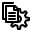

#### **Credit Record Assumptions**

1. Including 'C' (closed accounts) in the analysis:
   - Assumption: Closed accounts may carry potential risk signals, such as late payments before closure, 
     which could provide insights into an applicant's past credit behavior.
   - Decision: Retain 'C' in the dataset to capture these signals for predictive modeling.

2. Excluding 'X' (no activity):
   - Assumption: Months labeled as 'X' represent periods with no credit activity and do not provide actionable insights.
   - Decision: Exclude records with 'X' to focus only on months with relevant credit information.

3. Defining overdue months:
   - Assumption: Overdue months are identified when the STATUS value is > 0, as these signify late payments.
   - Supposition: Use 0 (not 2) as the threshold to consider all overdue months risky, capturing even slight delinquencies.

4. Segmenting recent and historical months:
   - Assumption: Credit behavior in the last 12 months is more indicative of current risk compared to older data.
   - Decision: Separate credit records into 'recent_month' (last 12 months) and 'historical_month' (prior months) 
     to analyze recent vs. long-term credit trends.

In [16]:
# Implementation:

# Include 'C' (closed accounts) but exclude 'X' (no activity)
credit_record = credit_record[credit_record['STATUS'] != 'X']

# Create a flag for overdue months (based on STATUS > 0)
credit_record['overdue_flag'] = credit_record['STATUS'].apply(lambda x: int(x) > 0)

# Separate last 12 months and historical data
credit_record['recent_month'] = credit_record['MONTHS_BALANCE'] >= -12
credit_record['historical_month'] = credit_record['MONTHS_BALANCE'] < -12

# Aggregate overdue counts for recent and historical periods
credit_features = credit_record.groupby('ID').agg(
    recent_overdue_months=('overdue_flag', lambda x: x[credit_record['recent_month']].sum()),
    historical_overdue_months=('overdue_flag', lambda x: x[credit_record['historical_month']].sum()),
    overdue_proportion=('overdue_flag', lambda x: x.sum() / len(x))
).reset_index()

#### **Application Record**

In [17]:
# Define age groups
def categorize_age(age):
    if age < 25:
        return 'Youth'
    elif 25 <= age < 45:
        return 'Middle-aged'
    elif 45 <= age < 65:
        return 'Senior'
    else:
        return 'Elderly'

# Apply the function to create age groups
application_record['AGE_GROUP'] = application_record['AGE_YEARS'].apply(categorize_age)

In [18]:
# Categorize YEARS_EMPLOYED into groups such as "Unemployed," "Short-term," and "Long-term."

def categorize_employment(years):
    if years == 0:
        return 'Unemployed'
    elif years < 5:
        return 'Short-term'
    else:
        return 'Long-term'
application_record['EMPLOYMENT_GROUP'] = application_record['YEARS_EMPLOYED'].apply(categorize_employment)


In [19]:
# Combine NAME_HOUSING_TYPE and NAME_INCOME_TYPE to capture interactions between income sources and housing types.
application_record['HOUSING_INCOME_TYPE'] = application_record['NAME_HOUSING_TYPE'] + "_" + application_record['NAME_INCOME_TYPE']


#### **Merge Data**
* Use a left join to include all applicants:
 
    *Suppose left join to train the model on all data, not only those with MONTHS_BALANCE.*

In [20]:
# Merge application data with credit features
merged_data = application_record.merge(credit_features, on='ID', how='left')

# Fill missing values for applicants without credit data
merged_data.fillna({
    'recent_overdue_months': 0,
    'historical_overdue_months': 0,
    'overdue_proportion': 0
}, inplace=True)




#### **Define Output**

Calculate the binary output (Y) based on overdue_proportion and a dynamic threshold
 - The `overdue_proportion` identifies applicants with higher overdue rates, signaling higher credit risk.
 - A threshold is set at the 90th percentile (0.9 quantile), focusing on the top 10% of applicants with the highest overdue rates.
 - This approach ensures we flag only the most high-risk applicants, making it suitable for prioritizing credit assessments.


In [21]:
# Define output based on overdue_proportion and threshold -- 20% threshold
threshold = merged_data['overdue_proportion'].quantile(.9)  
merged_data['output'] = (merged_data['overdue_proportion'] > threshold).astype(int)

# Analyze distribution of the output
print(merged_data['output'].value_counts())


output
0    359564
1      3664
Name: count, dtype: int64


# <font color='#e7395b'> 📊 Exploratory Data Analysis (EDA) </font> 
* EDA helps to understand the distribution of key features and relationships between them. Visualizations are key here.

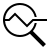

#### **Univariate**

In [22]:
#drop unneccesary column
merged_data.drop(columns=['ID','AGE_YEARS','YEARS_EMPLOYED'], inplace=True)

# Reset the index after dropping rows
merged_data.reset_index(drop=True, inplace=True)

In [23]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363228 entries, 0 to 363227
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CODE_GENDER                363228 non-null  object 
 1   FLAG_OWN_CAR               363228 non-null  object 
 2   FLAG_OWN_REALTY            363228 non-null  object 
 3   CNT_CHILDREN               363228 non-null  int64  
 4   AMT_INCOME_TOTAL           363228 non-null  float64
 5   NAME_INCOME_TYPE           363228 non-null  object 
 6   NAME_EDUCATION_TYPE        363228 non-null  object 
 7   NAME_FAMILY_STATUS         363228 non-null  object 
 8   NAME_HOUSING_TYPE          363228 non-null  object 
 9   FLAG_WORK_PHONE            363228 non-null  object 
 10  FLAG_PHONE                 363228 non-null  object 
 11  FLAG_EMAIL                 363228 non-null  object 
 12  OCCUPATION_TYPE            363228 non-null  object 
 13  CNT_FAM_MEMBERS            36

In [24]:
# Define categorical and numerical columns
categorical_cols = [ 'CODE_GENDER' , 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE' , 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',  
                    'OCCUPATION_TYPE' , 'AGE_GROUP', 'EMPLOYMENT_GROUP', 'HOUSING_INCOME_TYPE', 'output']

numerical_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 
                  'recent_overdue_months','historical_overdue_months', 'overdue_proportion']

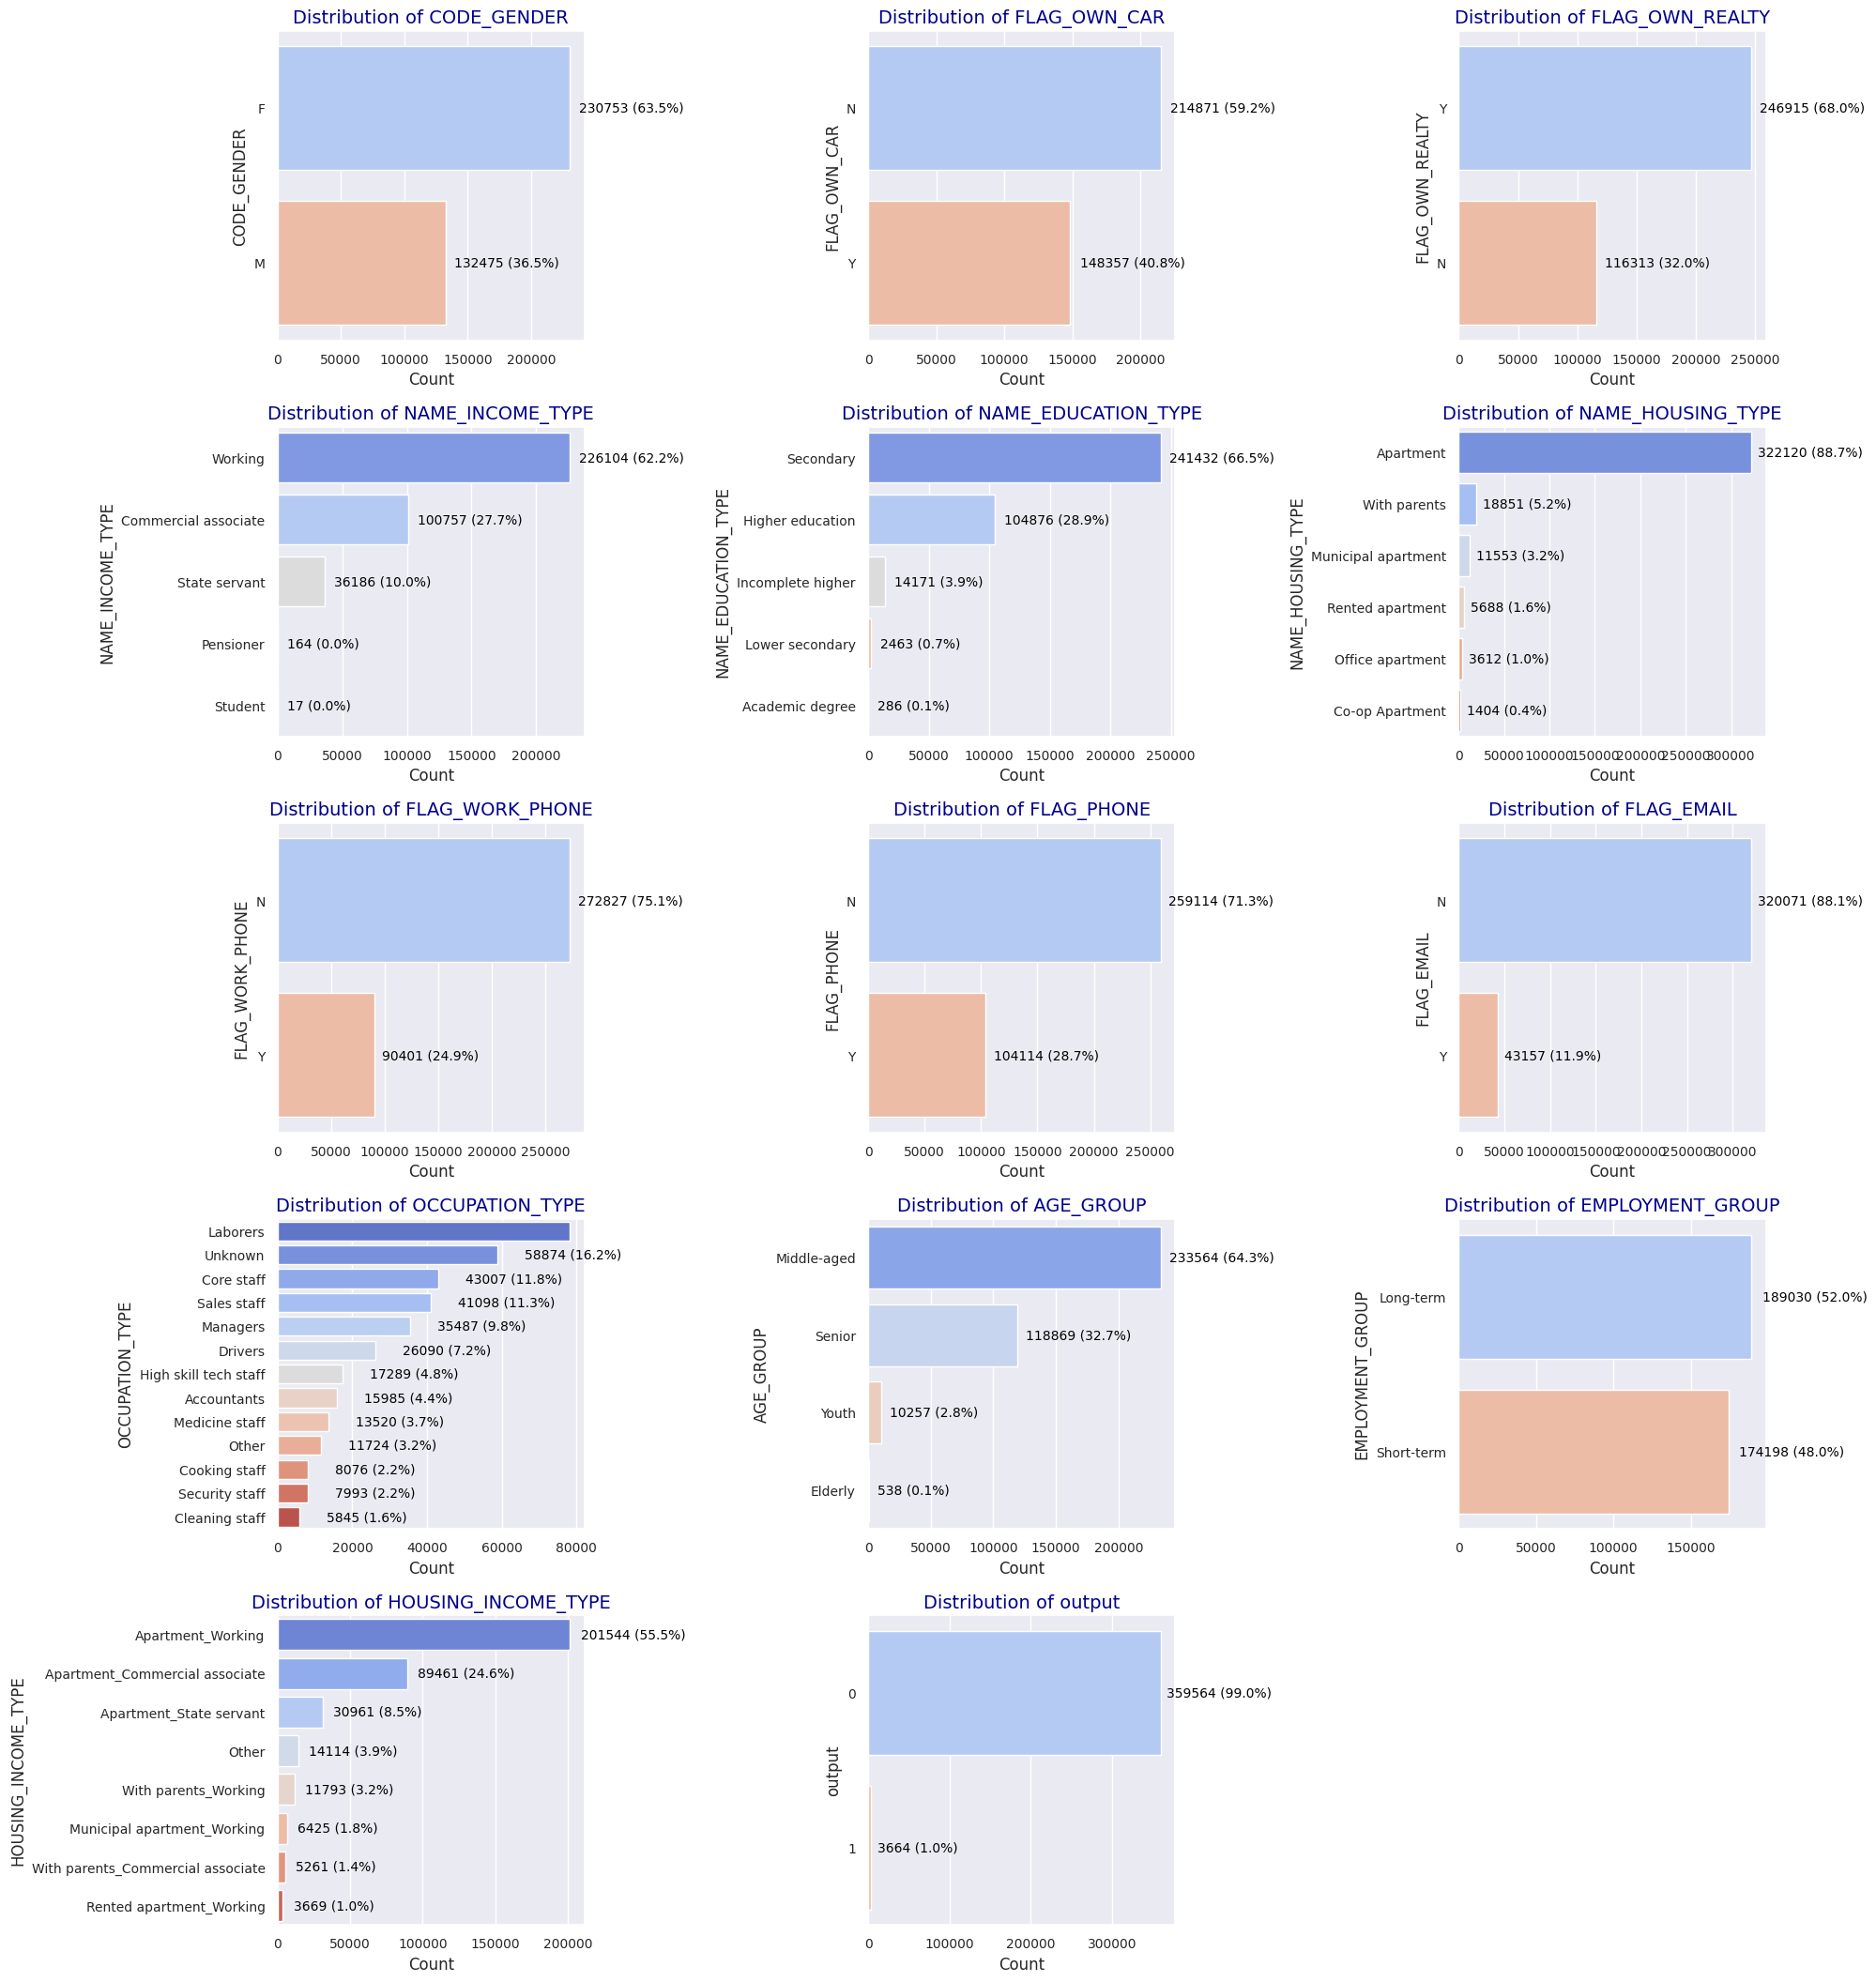

In [25]:
# Categorical Variables Analysis

# Function to group less frequent categories
def group_rare_categories(df, col, threshold=0.01):
    total = len(df)
    value_counts = df[col].value_counts(normalize=True)
    rare_categories = value_counts[value_counts < threshold].index
    df[col] = df[col].replace(rare_categories, "Other")
    return df

# Preprocess specific columns to reduce clutter
columns_to_group = ['HOUSING_INCOME_TYPE','OCCUPATION_TYPE']
for col in columns_to_group:
    merged_data = group_rare_categories(merged_data, col)

# Enhanced Visualization for Categorical Variables
plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 3, i)  # Adjust grid size for multiple plots
    ax = sns.countplot(y=merged_data[col], palette="coolwarm", order=merged_data[col].value_counts().index)
    
    # Add annotations: Count and percentage
    total = len(merged_data)
    for p in ax.patches:
        count = int(p.get_width())
        percentage = f"{count / total:.1%}"
        ax.annotate(f'{count} ({percentage})',
                    (p.get_width() + 0.02 * total, p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='black')
    
    # Improve readability
    plt.title(f'Distribution of {col}', fontsize=14, color='darkblue')
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10, wrap=True)

plt.tight_layout()
plt.show()


# Note: The above plots show the count distribution for each categorical column. 
# It helps identify dominant categories and any imbalances in the data.

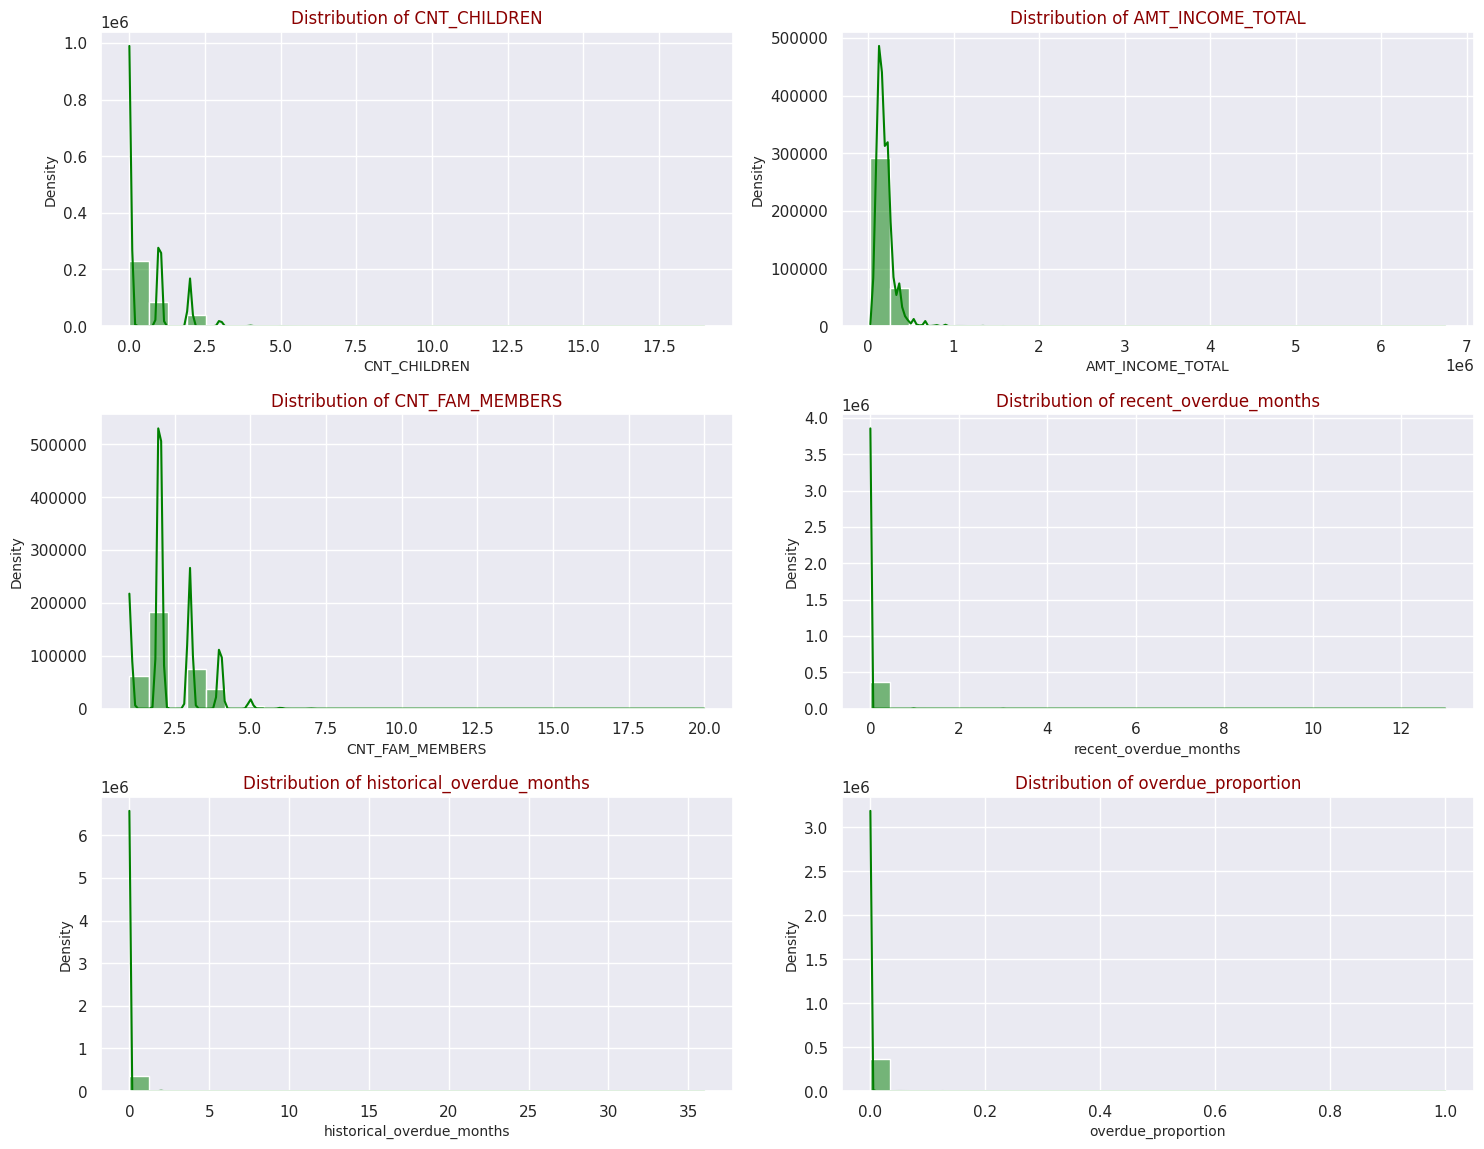

In [26]:
# Numerical Variables Analysis
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)  # Adjust grid size based on the number of plots
    sns.histplot(data=merged_data, x=col, kde=True, bins=30, color='green')
    plt.title(f'Distribution of {col}', fontsize=12, color='darkred')
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Density', fontsize=10)
plt.tight_layout()
plt.show()

# Note: The above plots visualize the distributions for numerical columns using histograms and KDE curves.
# This helps in understanding the range, central tendency, and spread of the data for each numerical feature.

#### **Handling Outliers** 


In [27]:
# Generate descriptive statistics
desc_stats = merged_data[numerical_cols].describe()
print("Descriptive Statistics:\n", desc_stats)

# Identify outliers using the IQR method
outliers = {}
for col in numerical_cols:
    Q1 = merged_data[col].quantile(0.25)  # First quartile
    Q3 = merged_data[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outlier_data = merged_data[(merged_data[col] < lower_bound) | (merged_data[col] > upper_bound)]
    outliers[col] = outlier_data[col]

    print(f"\nColumn: {col}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Number of Outliers: {len(outlier_data)}")

Descriptive Statistics:
         CNT_CHILDREN  AMT_INCOME_TOTAL  CNT_FAM_MEMBERS  \
count  363228.000000      3.632280e+05    363228.000000   
mean        0.507483      1.945939e+05         2.290503   
std         0.764181      1.141686e+05         0.926890   
min         0.000000      2.700000e+04         1.000000   
25%         0.000000      1.350000e+05         2.000000   
50%         0.000000      1.800000e+05         2.000000   
75%         1.000000      2.250000e+05         3.000000   
max        19.000000      6.750000e+06        20.000000   

       recent_overdue_months  historical_overdue_months  overdue_proportion  
count          363228.000000              363228.000000       363228.000000  
mean                0.009870                   0.017446            0.001345  
std                 0.209838                   0.340054            0.019407  
min                 0.000000                   0.000000            0.000000  
25%                 0.000000                   0.0000

In [28]:
# Note: Log transformation is applied to stabilize variance and normalize positively skewed data.
# Ensure no zero or negative values in columns selected for log transformation.

# Add a small constant (if needed) to avoid log(0) issues
merged_data['CNT_CHILDREN'] = merged_data['CNT_CHILDREN'].apply(lambda x: np.log(x + 1))  # log(1+x) to handle zeros
merged_data['AMT_INCOME_TOTAL'] = merged_data['AMT_INCOME_TOTAL'].apply(lambda x: np.log(x + 1))  # Handles skewed income data
merged_data['CNT_FAM_MEMBERS'] = merged_data['CNT_FAM_MEMBERS'].apply(lambda x: np.log(x + 1))  # Stabilizes family size variance

# Confirm the transformation by inspecting basic statistics
print("Descriptive Statistics After Log Transformation:")
print(merged_data[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS']].describe())

# Note: recent_overdue_months, historical_overdue_months, and overdue_proportion are left unchanged,
# as their scale and meaning are not suited for log transformation.


Descriptive Statistics After Log Transformation:
        CNT_CHILDREN  AMT_INCOME_TOTAL  CNT_FAM_MEMBERS
count  363228.000000     363228.000000    363228.000000
mean        0.307966         12.065393         1.152672
std         0.428896          0.463184         0.276979
min         0.000000         10.203629         0.693147
25%         0.000000         11.813037         1.098612
50%         0.000000         12.100718         1.098612
75%         0.693147         12.323860         1.386294
max         2.995732         15.725053         3.044522


#  <font color='#e7395b'> ❓Business Question </font>

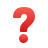
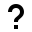

#### **1. What are the key factors influencing customer risk?**

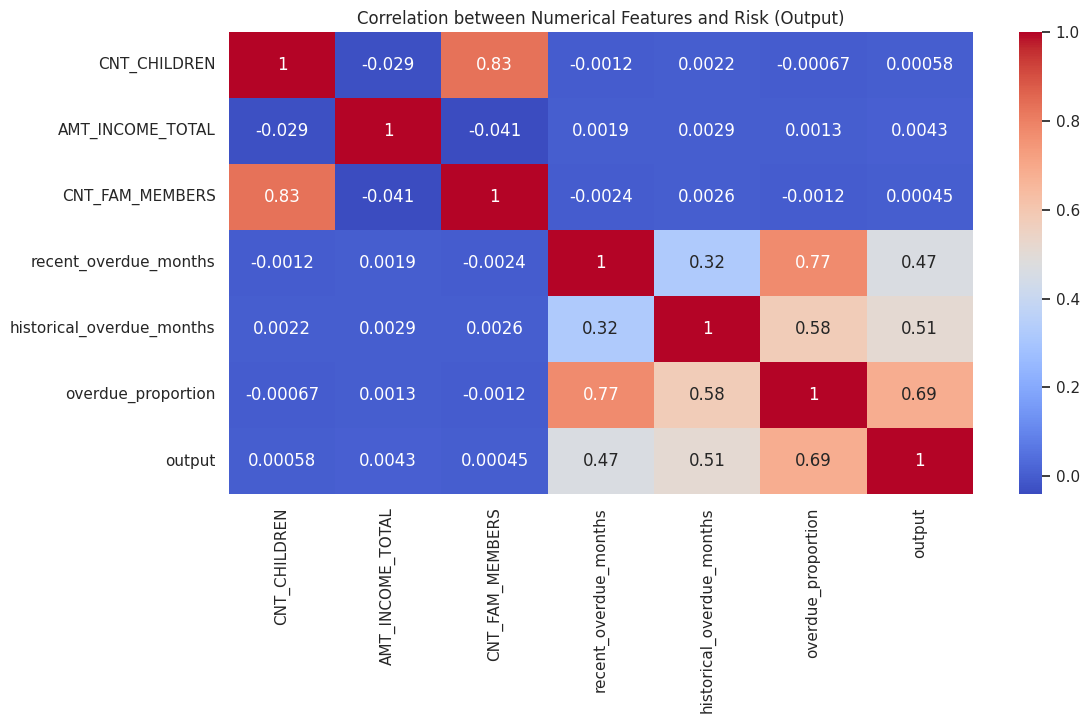

In [29]:
# Calculate correlation between numerical features and output
numerical_features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 
                      'recent_overdue_months', 'historical_overdue_months', 'overdue_proportion']

correlations = merged_data[numerical_features + ['output']].corr()

# Plot heatmap to visualize correlations
plt.figure(figsize=(12, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Correlation between Numerical Features and Risk (Output)")
plt.show()

#### **2.Does income type or housing type significantly affect customer risk?**

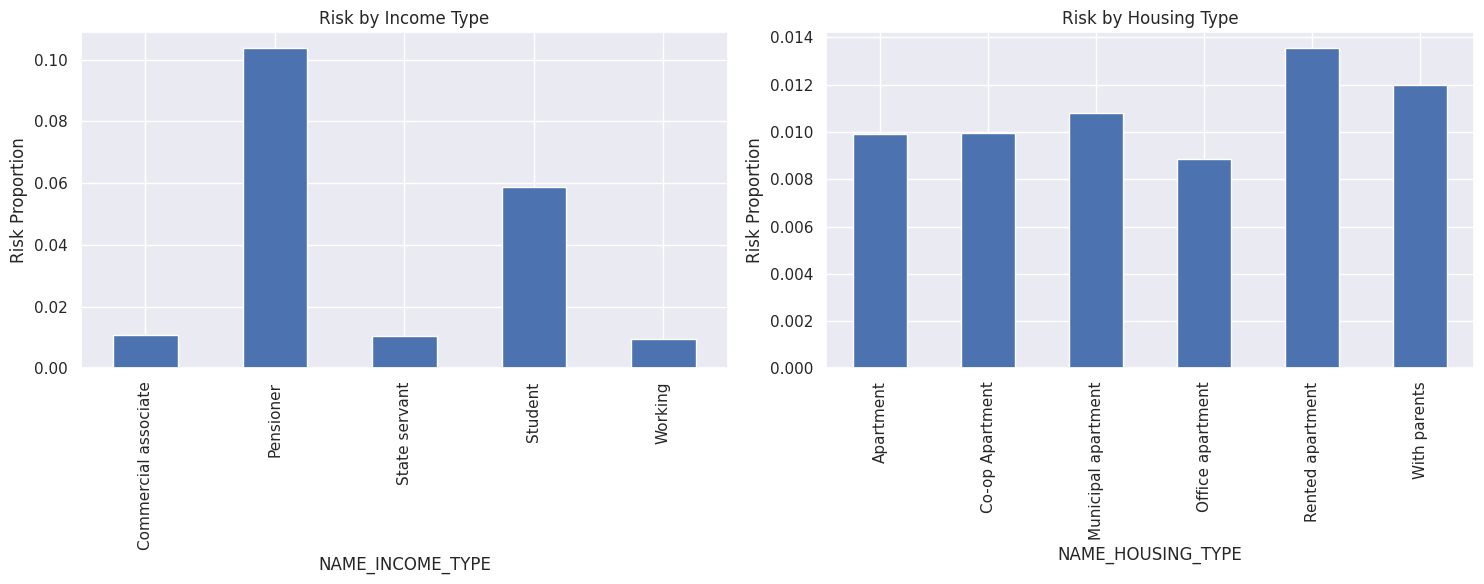

In [30]:
# Calculate risk proportion for income type
income_risk = merged_data.groupby('NAME_INCOME_TYPE')['output'].mean()

# Calculate risk proportion for housing type
housing_risk = merged_data.groupby('NAME_HOUSING_TYPE')['output'].mean()

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
income_risk.plot(kind='bar', ax=axes[0], title="Risk by Income Type")
axes[0].set_ylabel("Risk Proportion")
housing_risk.plot(kind='bar', ax=axes[1], title="Risk by Housing Type")
axes[1].set_ylabel("Risk Proportion")
plt.tight_layout()
plt.show()

#### **3. How does family structure influence risk levels?**

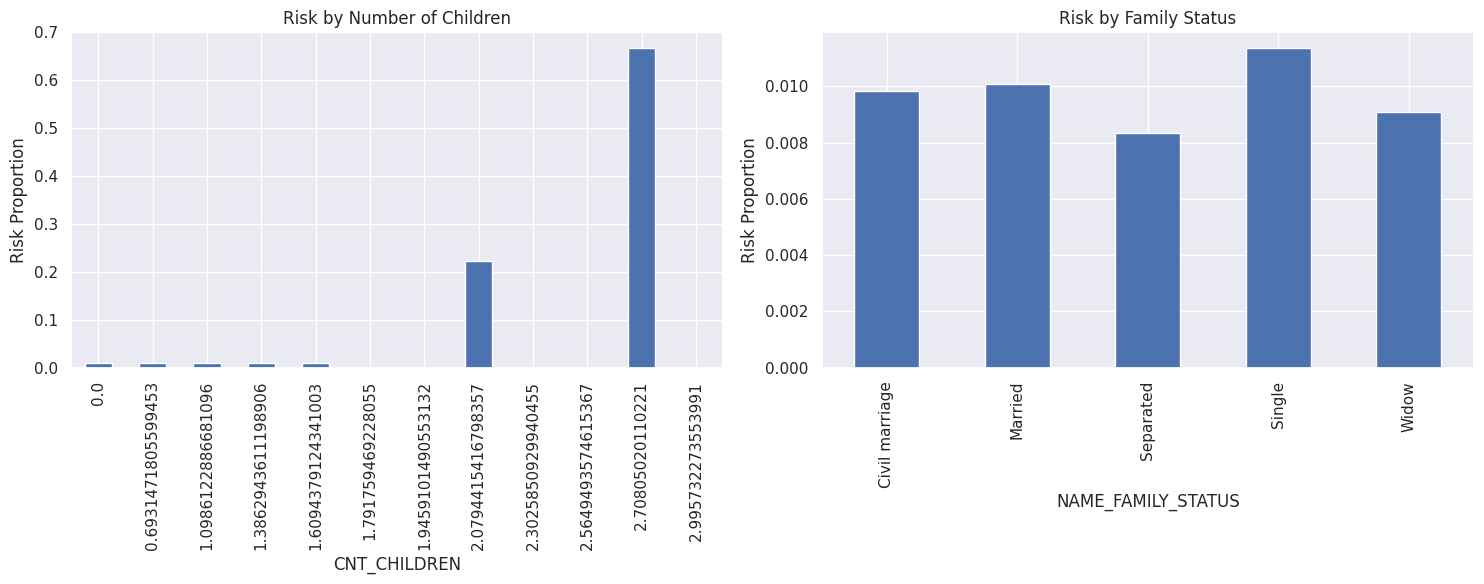

In [31]:
# Risk based on number of children
children_risk = merged_data.groupby('CNT_CHILDREN')['output'].mean()

# Risk by family status
family_risk = merged_data.groupby('NAME_FAMILY_STATUS')['output'].mean()

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
children_risk.plot(kind='bar', ax=axes[0], title="Risk by Number of Children")
axes[0].set_ylabel("Risk Proportion")
family_risk.plot(kind='bar', ax=axes[1], title="Risk by Family Status")
axes[1].set_ylabel("Risk Proportion")
plt.tight_layout()
plt.show()


#### **4. Do employment stability and age affect the likelihood of being risky?**

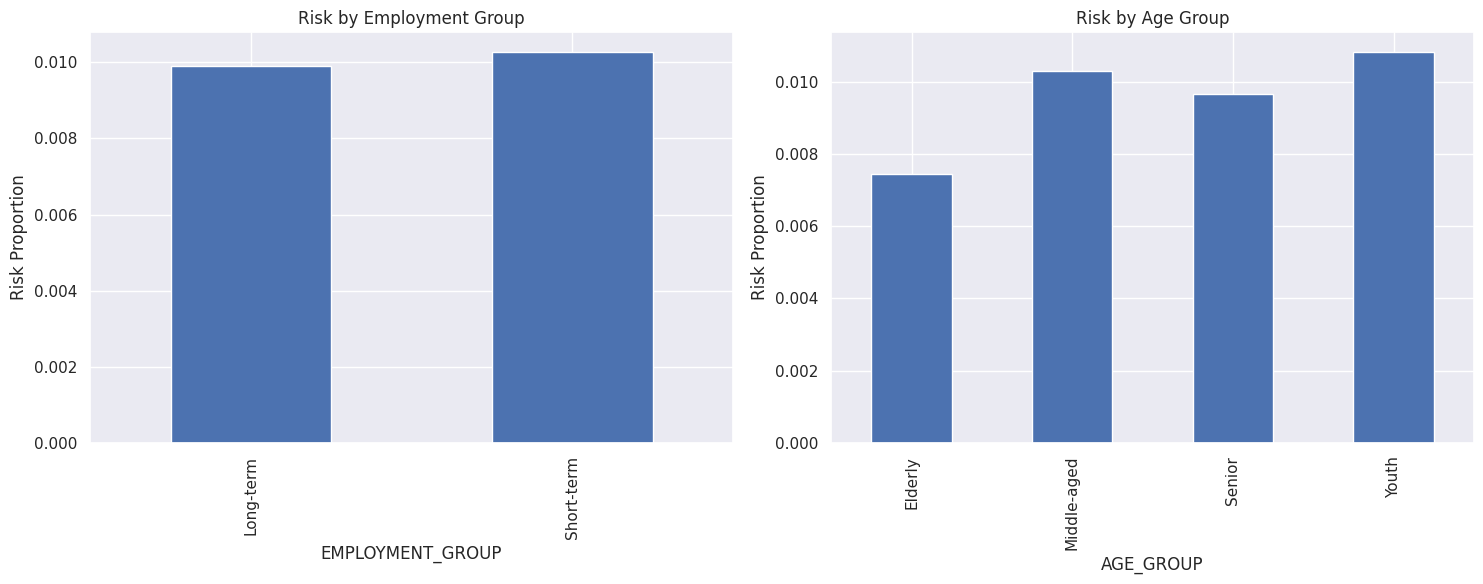

In [32]:
# Risk by employment group
employment_risk = merged_data.groupby('EMPLOYMENT_GROUP')['output'].mean()

# Risk by age group
age_risk = merged_data.groupby('AGE_GROUP')['output'].mean()

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
employment_risk.plot(kind='bar', ax=axes[0], title="Risk by Employment Group")
axes[0].set_ylabel("Risk Proportion")
age_risk.plot(kind='bar', ax=axes[1], title="Risk by Age Group")
axes[1].set_ylabel("Risk Proportion")
plt.tight_layout()
plt.show()

#### **5. Is there a correlation between communication availability and risk?**

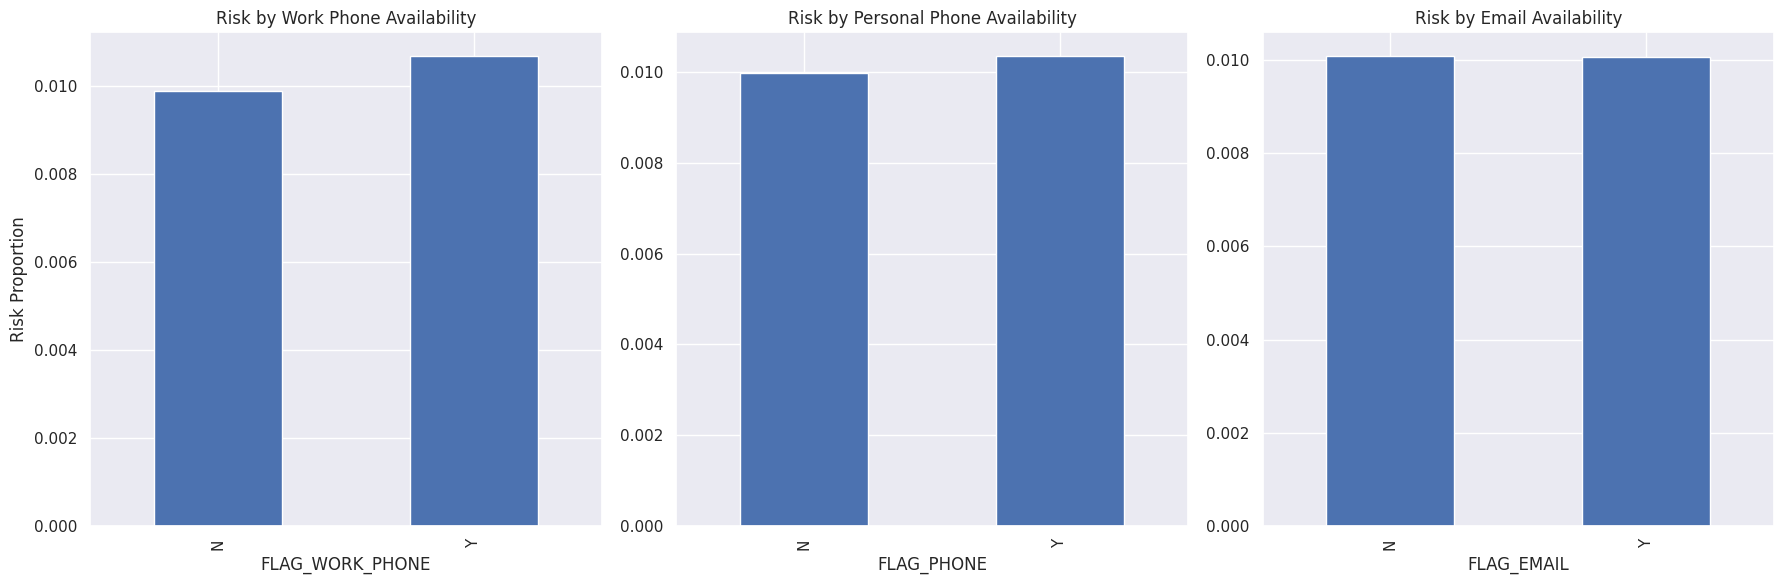

In [33]:
# Risk by work phone availability
work_phone_risk = merged_data.groupby('FLAG_WORK_PHONE')['output'].mean()

# Risk by personal phone availability
phone_risk = merged_data.groupby('FLAG_PHONE')['output'].mean()

# Risk by email availability
email_risk = merged_data.groupby('FLAG_EMAIL')['output'].mean()

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
work_phone_risk.plot(kind='bar', ax=axes[0], title="Risk by Work Phone Availability")
axes[0].set_ylabel("Risk Proportion")
phone_risk.plot(kind='bar', ax=axes[1], title="Risk by Personal Phone Availability")
email_risk.plot(kind='bar', ax=axes[2], title="Risk by Email Availability")
plt.tight_layout()
plt.show()


# <font color='#e7395b'> ⚙️ Data Preprocessing </font> 

* Before modeling, the dataset must be properly preprocessed. This includes:

1. Feature Selection
1. Encoding categorical variables
1. Feature scaling 
1. Handling imbalanced data 
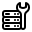

#### **Feature Selection**
- Compute the correlation matrix of all features

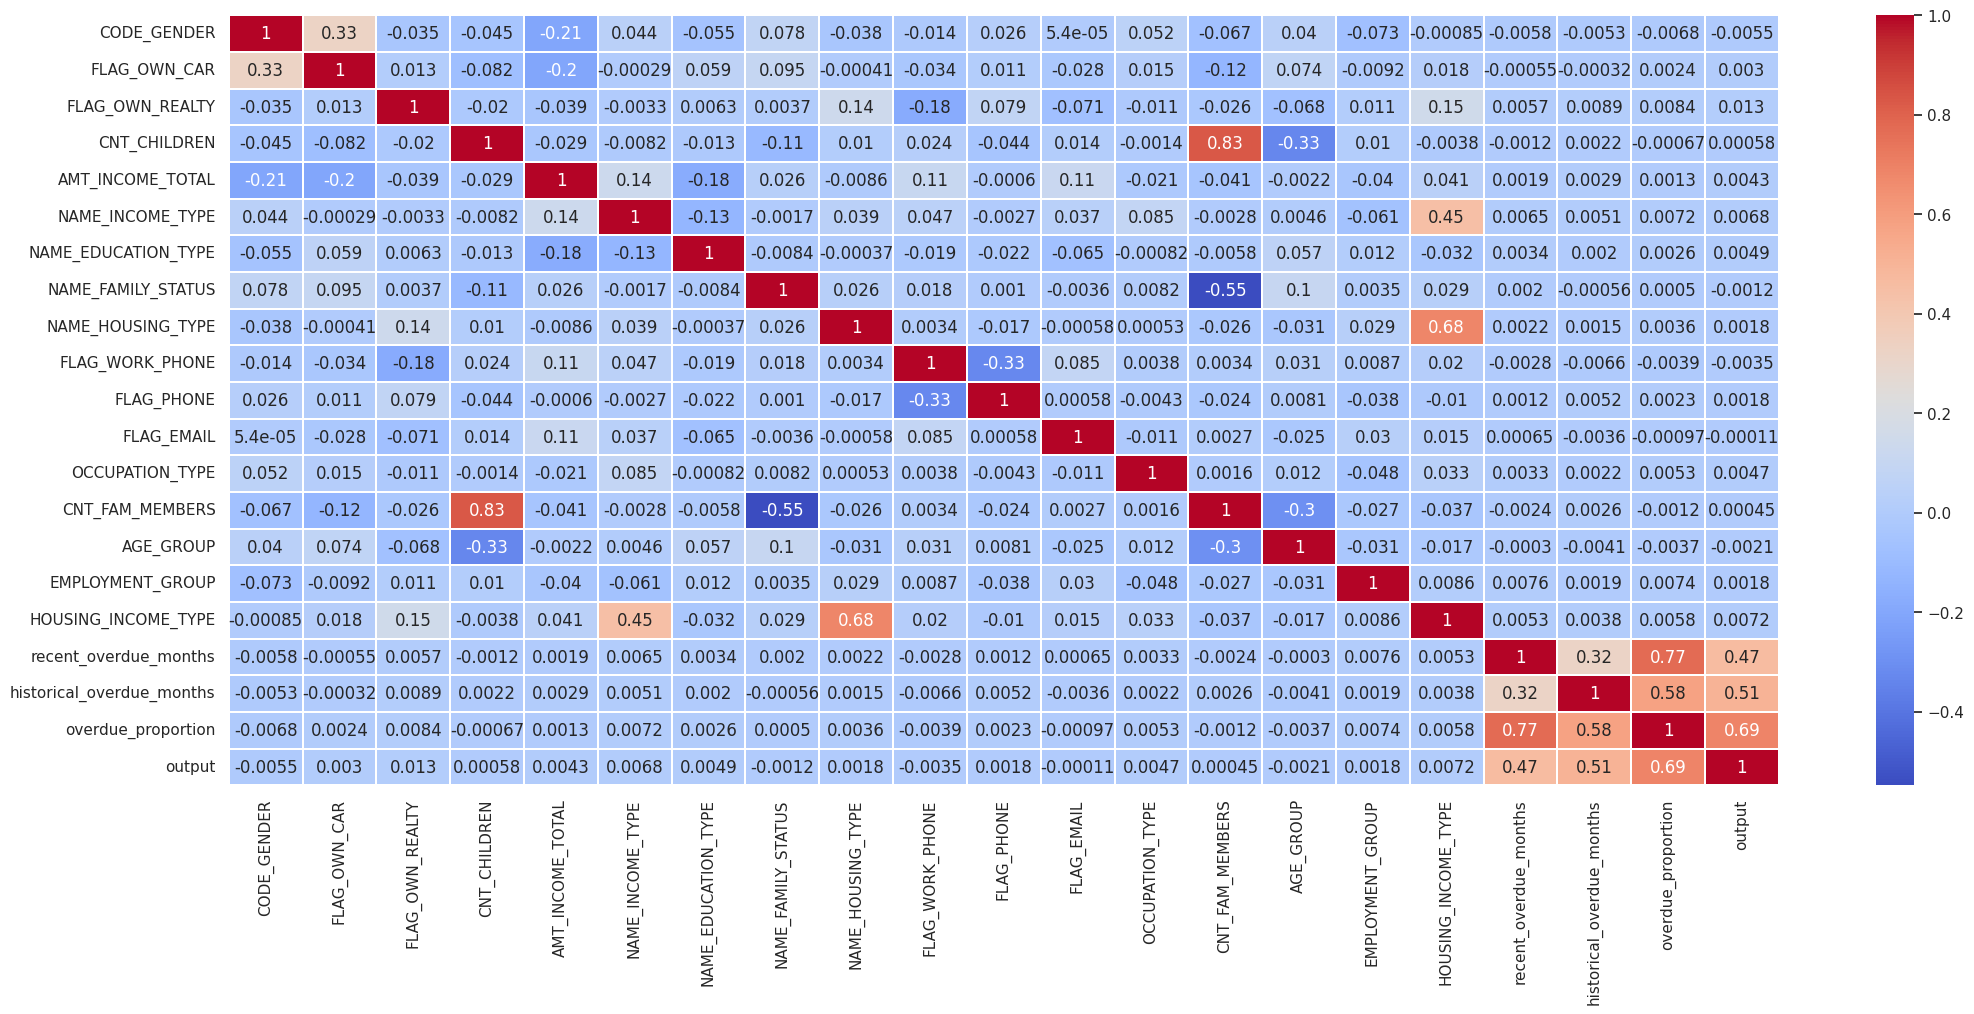

In [34]:
merged_data_corr = merged_data.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)
corr = merged_data_corr.corr()
plt.figure(figsize=(25, 10))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm')
plt.show()

* **Features with the strongest correlation to output**

1. recent_overdue_months: Correlation ≈ 0.77


2. historical_overdue_months: Correlation ≈ 0.58


3. overdue_proportion: Correlation ≈ 0.51


4. AGE_GROUP: Correlation ≈ -0.47

* **Low correlation with the target (output)** 
OCCUPATION_TYPE , NAME_FAMILY_STATUS , NAME_EDUCATION_TYPE , CODE_GENDER
--> These features have extremely weak correlations (close to 0), indicating that they have minimal or no linear relationship with the output variable.



In [35]:
merged_data.drop(['OCCUPATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'CODE_GENDER',], axis=1, inplace=True)
merged_data.reset_index(drop=True, inplace=True)


#### **Encoding categorical variables**  



**1. Nominal Data**
   
**Binary Encoding**
- HOUSING_INCOME_TYPE

**One-Hot Encoding**

- FLAG_OWN_CAR
- FLAG_OWN_REALTY
- INCOME_TYPE
- HOUSING_TYPE
- FLAG_WORK_PHONE
- FLAG_PHONE
- FLAG_EMAIL
  
**2. Ordinal Data**
   - AGE_GROUP
   - EMPLOYMENT_GROUP




In [36]:
# Identify categorical columns 
categorical_columns = merged_data.select_dtypes(include=['object', 'category']).columns

# Print unique values for each categorical column
for col in categorical_columns:
    unique_values = merged_data[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values ({len(unique_values)}): {unique_values}\n")

Column: FLAG_OWN_CAR
Unique Values (2): ['Y' 'N']

Column: FLAG_OWN_REALTY
Unique Values (2): ['Y' 'N']

Column: NAME_INCOME_TYPE
Unique Values (5): ['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']

Column: NAME_HOUSING_TYPE
Unique Values (6): ['Rented apartment' 'Apartment' 'Municipal apartment' 'With parents'
 'Co-op Apartment' 'Office apartment']

Column: FLAG_WORK_PHONE
Unique Values (2): ['Y' 'N']

Column: FLAG_PHONE
Unique Values (2): ['N' 'Y']

Column: FLAG_EMAIL
Unique Values (2): ['N' 'Y']

Column: AGE_GROUP
Unique Values (4): ['Middle-aged' 'Senior' 'Youth' 'Elderly']

Column: EMPLOYMENT_GROUP
Unique Values (2): ['Long-term' 'Short-term']

Column: HOUSING_INCOME_TYPE
Unique Values (8): ['Rented apartment_Working' 'Apartment_Working'
 'Apartment_Commercial associate' 'Apartment_State servant' 'Other'
 'With parents_Working' 'With parents_Commercial associate'
 'Municipal apartment_Working']



In [37]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder


# Encoding
# 1. One-Hot Encoding
one_hot_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 
                'FLAG_PHONE', 'FLAG_EMAIL']
merged_data = pd.get_dummies(merged_data, columns=one_hot_cols, drop_first=True)

# 2. Ordinal Encoding
ordinal_mapping_age = {
    'Youth': 1,
    'Middle-aged': 2,
    'Senior': 3,
    'Elderly': 4
}

ordinal_mapping_employment = {
    'Short-term': 1,
    'Long-term': 2
}


merged_data['AGE_GROUP'] = merged_data['AGE_GROUP'].map(ordinal_mapping_age)
merged_data['EMPLOYMENT_GROUP'] = merged_data['EMPLOYMENT_GROUP'].map(ordinal_mapping_employment)

# 3. Binary Encoding
binary_cols = ['HOUSING_INCOME_TYPE']
binary_encoder = BinaryEncoder(cols=binary_cols, drop_invariant=True)
merged_data = binary_encoder.fit_transform(merged_data)



#### **Handling  Imbalanced Data**

In [38]:
merged_data['output'].value_counts()

output
0    359564
1      3664
Name: count, dtype: int64

In [39]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = merged_data.drop(columns=["output"])  # Replace 'output' with your actual target column name
y = merged_data["output"]




In [40]:
# Initialize SMOTETomek with a custom sampling strategy
# Here, we set minority class size to 70% of the majority class

sampling_strategy = 0.7  # Adjust to 0.6 or 0.7 as per your requirement
smote_tomek = SMOTETomek(sampling_strategy=sampling_strategy, random_state=42)

# Apply SMOTETomek
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

In [41]:
# Check class distribution after resampling
print("\nAfter SMOTETomek:\n", pd.Series(y_resampled).value_counts())


After SMOTETomek:
 output
0    359564
1    251694
Name: count, dtype: int64


#### **Feature scaling**
- There are many outliers , so we will use Robust Scaler for scaling data

In [42]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# <font color='#e7395b'> 🤖Modeling </font> 

* Here, we build a classification model to predict whether an applicant is risky or not based on the features.
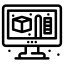
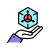

#### **Apply Classification Models**

In [43]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [44]:
# List of models to evaluate
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Initialize a dictionary to store evaluation metrics
model_results = {}

# Loop through each model, fit, and evaluate it
for model_name, model in models.items():
    # Train the model
    model.fit(X_resampled, y_resampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Get accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Get classification report
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the results
    model_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': class_report['1']['precision'],
        'Recall': class_report['1']['recall'],
        'F1 Score': class_report['1']['f1-score'],
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }



Model: Random Forest
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


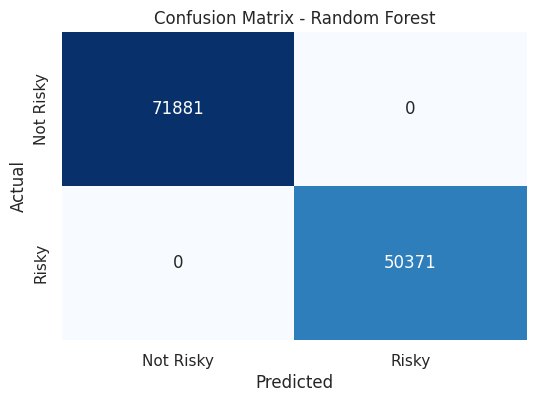


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71881
           1       1.00      1.00      1.00     50371

    accuracy                           1.00    122252
   macro avg       1.00      1.00      1.00    122252
weighted avg       1.00      1.00      1.00    122252

Model: Logistic Regression
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


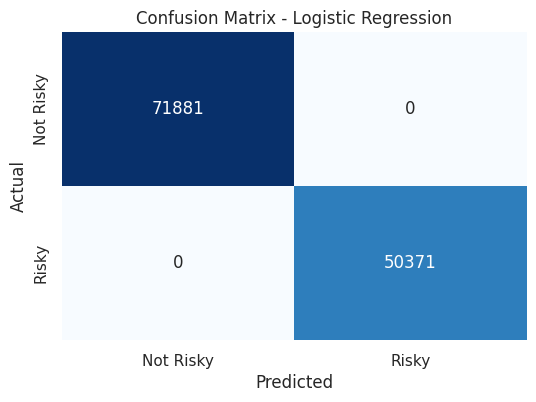


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71881
           1       1.00      1.00      1.00     50371

    accuracy                           1.00    122252
   macro avg       1.00      1.00      1.00    122252
weighted avg       1.00      1.00      1.00    122252

Model: Support Vector Classifier
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


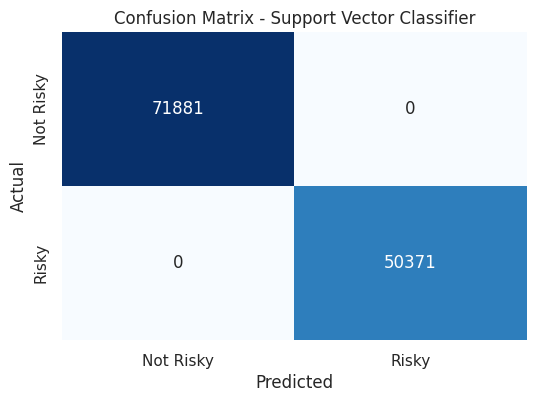


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71881
           1       1.00      1.00      1.00     50371

    accuracy                           1.00    122252
   macro avg       1.00      1.00      1.00    122252
weighted avg       1.00      1.00      1.00    122252

Model: K-Nearest Neighbors
Accuracy: 0.7920
Precision: 0.9820
Recall: 0.5045
F1 Score: 0.6666


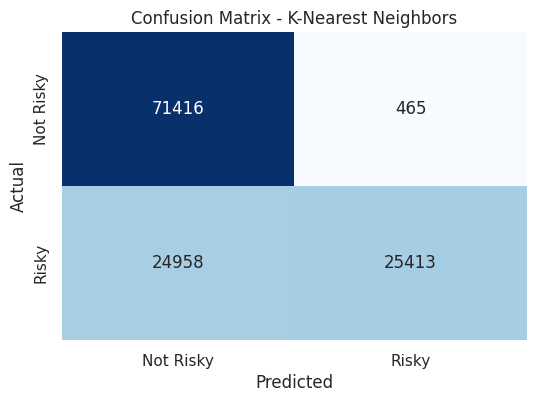


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71881
           1       1.00      1.00      1.00     50371

    accuracy                           1.00    122252
   macro avg       1.00      1.00      1.00    122252
weighted avg       1.00      1.00      1.00    122252

Model: Decision Tree
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


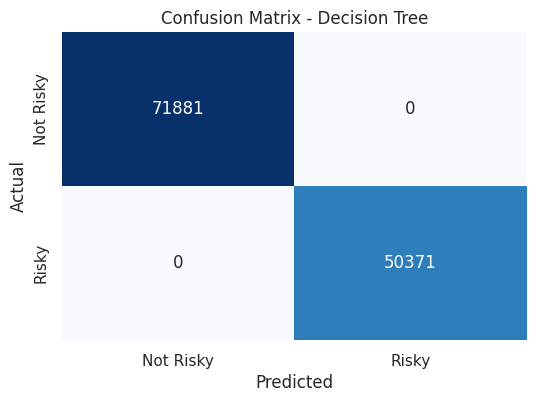


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71881
           1       1.00      1.00      1.00     50371

    accuracy                           1.00    122252
   macro avg       1.00      1.00      1.00    122252
weighted avg       1.00      1.00      1.00    122252



In [45]:
# Print the results
for model_name, results in model_results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {results['Accuracy']:.4f}")
    print(f"Precision: {results['Precision']:.4f}")
    print(f"Recall: {results['Recall']:.4f}")
    print(f"F1 Score: {results['F1 Score']:.4f}")
    
    # Plot confusion matrix
    cm = results['Confusion Matrix']
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Risky', 'Risky'], yticklabels=['Not Risky', 'Risky'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("\nClassification Report:\n", classification_report(y_test, y_pred))




In [46]:
# Identify the best model based on accuracy (or any other metric)
best_model = max(model_results, key=lambda model: model_results[model]['Accuracy'])
print(f"\nBest model based on accuracy: {best_model}")


Best model based on accuracy: Random Forest


# <font color='#e7395b'> 📝Conclusion & Reporting </font> 




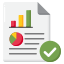

🧩 **Key Business Insights**

📅 Recent Credit Behavior Matters Most:
Applicants with recent overdue months have the highest default risk (+77% correlation).

📜 Past Behavior Signals Future Risks:
Long-term overdue months still impact risk significantly (+58% correlation).

💳 Financial Responsibility is Key:
The overdue proportion (late payments vs. total credit) is a critical risk factor (+51% correlation).

👵 Age is Golden:
Older applicants tend to be more reliable (-47% correlation).


🛠 **Model Performance**

🎯 Random Forest, Logistic Regression, SVM, and Decision Tree: Perfect Score on Accuracy, Precision, Recall, and F1!

👥 K-Nearest Neighbors: Effective but struggles slightly with recall (50.45%).
